<a href="https://colab.research.google.com/github/sunamkundal01/machine-learning-tutorials/blob/main/nlp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd


In [14]:
from google.colab import files
uploaded = files.upload()

Saving final sheet moview reviewss.xlsx to final sheet moview reviewss (1).xlsx


In [15]:
import pandas as pd


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [18]:
file_path = "final sheet moview reviewss.xlsx"
df = pd.read_excel(file_path)


In [19]:
df.head()

,Source.Name,date,Movie,Name,rating,Review
0,output (1).xlsx,2024-11-03,A Different Man Videos,Matías Mora Montero,7/10,A Different Man is provocative and facinating;...
1,output (1).xlsx,2024-11-01,A Different Man Videos,Aaron Neuwirth,8/10,Adam Pearson really shows range here. Having t...
2,output (1).xlsx,2024-10-31,A Different Man Videos,James Croot,4.5/5,This Cronenberg-esque psychological drama offe...
3,output (1).xlsx,2024-10-30,A Different Man Videos,Sandra Hall,3.5/5,An audacious and mordantly funny attempt to an...
4,output (1).xlsx,2024-10-29,A Different Man Videos,Chuck Bowen,Full Review,“A Different Man” is closer to an art-house ri...


In [20]:
# Replace 'review' and 'sentiment' with the actual column names
X = df['Movie']  # Text data
y = df['rating']  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [22]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [23]:
y_pred = model.predict(X_test_vec)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

       3.5/4       0.00      0.00      0.00         2
         3/4       0.00      0.00      0.00         1
         3/5       0.00      0.00      0.00         1
         4/4       0.00      0.00      0.00         1
         4/5       0.25      1.00      0.40         1
        7/10       0.00      0.00      0.00         1
        8/10       0.00      0.00      0.00         1
 Full Review       0.58      0.88      0.70         8

    accuracy                           0.50        16
   macro avg       0.10      0.23      0.14        16
weighted avg       0.31      0.50      0.38        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


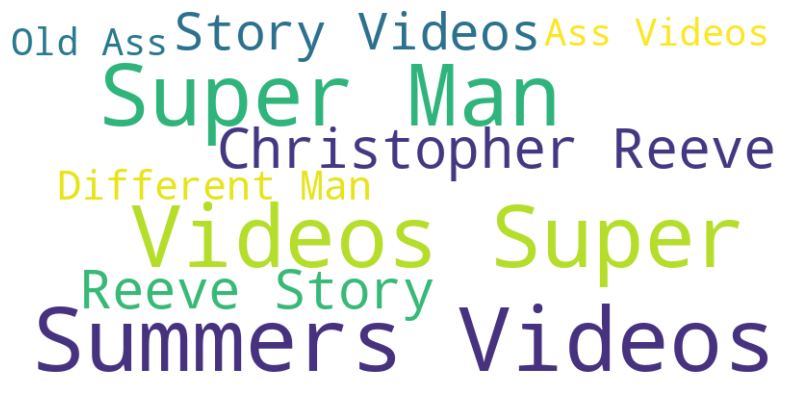

In [24]:
# Generate word cloud from the training text
all_words = ' '.join(X_train)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


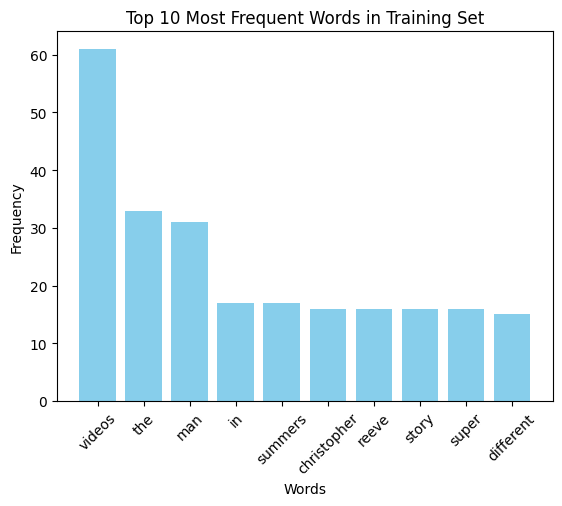

In [25]:
# Get word frequencies
word_counts = X_train_vec.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts))

# Sort words by frequency and select top 10
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Plot
words, counts = zip(*sorted_word_freq)
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in Training Set")
plt.xticks(rotation=45)
plt.show()
